In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf
%matplotlib inline

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
cf.go_offline()

In [3]:
data = pd.read_csv("C:\\Users\\Ravi Nadageri\\Downloads\\00001 Analysis\\virat_kohali.csv")

In [11]:
data.head()

,Runs,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,12,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,18-Aug-08
1,37,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,20-Aug-08
2,25,38,4,0,65.78,1,run out,1,v Sri Lanka,Colombo (RPS),24-Aug-08
3,54,66,7,0,81.81,1,bowled,1,v Sri Lanka,Colombo (RPS),27-Aug-08
4,31,46,3,1,67.39,1,lbw,2,v Sri Lanka,Colombo (RPS),29-Aug-08


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Runs        132 non-null    int64  
 1   BF          132 non-null    int64  
 2   4s          132 non-null    int64  
 3   6s          132 non-null    int64  
 4   SR          132 non-null    float64
 5   Pos         132 non-null    int64  
 6   Dismissal   132 non-null    object 
 7   Inns        132 non-null    int64  
 8   Opposition  132 non-null    object 
 9   Ground      132 non-null    object 
 10  Start Date  132 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 11.5+ KB


In [9]:
data.isnull().sum()

Runs          0
BF            0
4s            0
6s            0
SR            0
Pos           0
Dismissal     0
Inns          0
Opposition    0
Ground        0
Start Date    0
dtype: int64

In [12]:
# Total Runs Between 18-Aug-08 - 22-Jan-17

data['Runs'].sum()

6184

In [13]:
# Average Runs Between 18-Aug-08 - 22-Jan-17
data['Runs'].mean()

46.84848484848485

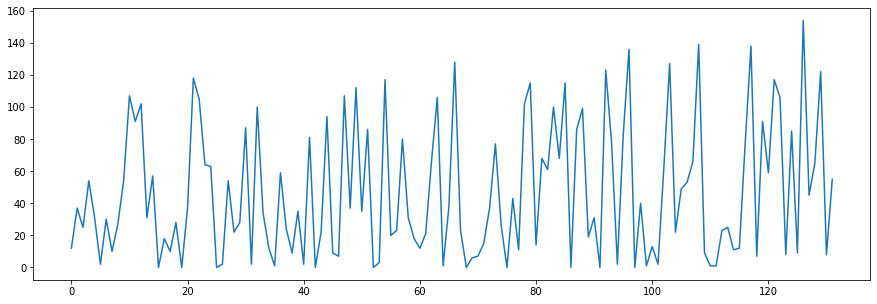

In [33]:
#trend of runs scored by Virat Kohli in his career from 18 August 2008 to 22 January 2017

fig = plt.figure(figsize=(15,5))

xl = list(data.index)
yl = data['Runs']
plt.plot(xl,yl)


Text(0, 0.5, 'Runs of Kohali')

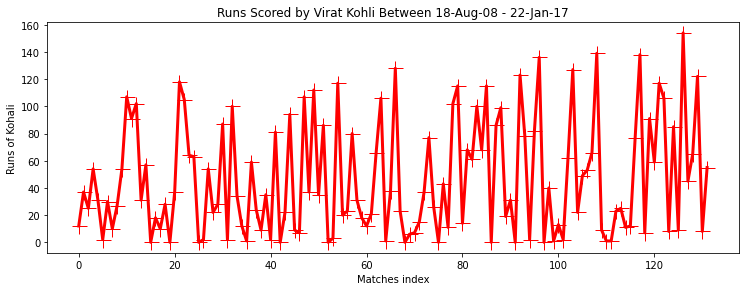

In [64]:
#trend of runs scored by Virat Kohli in his career from 18 August 2008 to 22 January 2017

fig = plt.figure(figsize=(12,4))

axes = fig.add_axes([0.2,0.2,0.8,0.8])
axes.plot(xl,yl,lw=3,c='red',marker='+',markersize=15)
axes.set_title('Runs Scored by Virat Kohli Between 18-Aug-08 - 22-Jan-17')
axes.set_xlabel("Matches index")
axes.set_ylabel('Runs of Kohali')

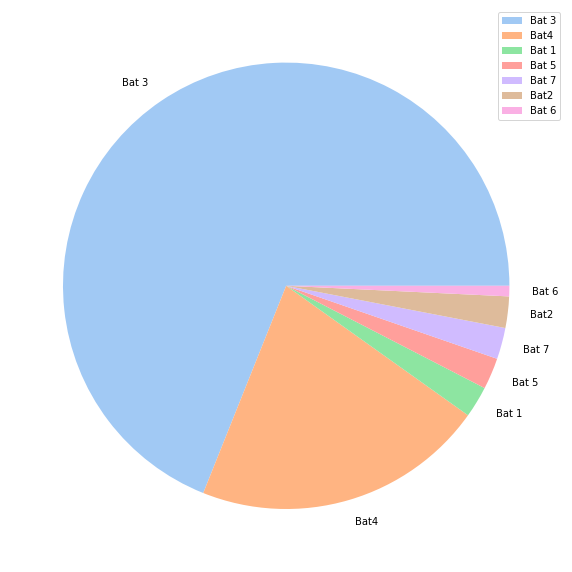

In [134]:
#Now let’s see all the batting positions played by Virat Kohli:
data['pos1'] = data['Pos'].map({1.0:'Bat 1',2.0:'Bat2',
                               3.0:'Bat 3', 4.0:'Bat4',
                               5.0:'Bat 5', 6.0:'Bat 6',
                               7.0:'Bat 7'})
fig = plt.figure(figsize = (10,15))
pos = data['pos1'].value_counts()
labels = pos.index
value = pos.values
colors = sns.color_palette('pastel')
plt.pie(x=pos,labels=labels,colors=colors)
plt.legend(loc=0)

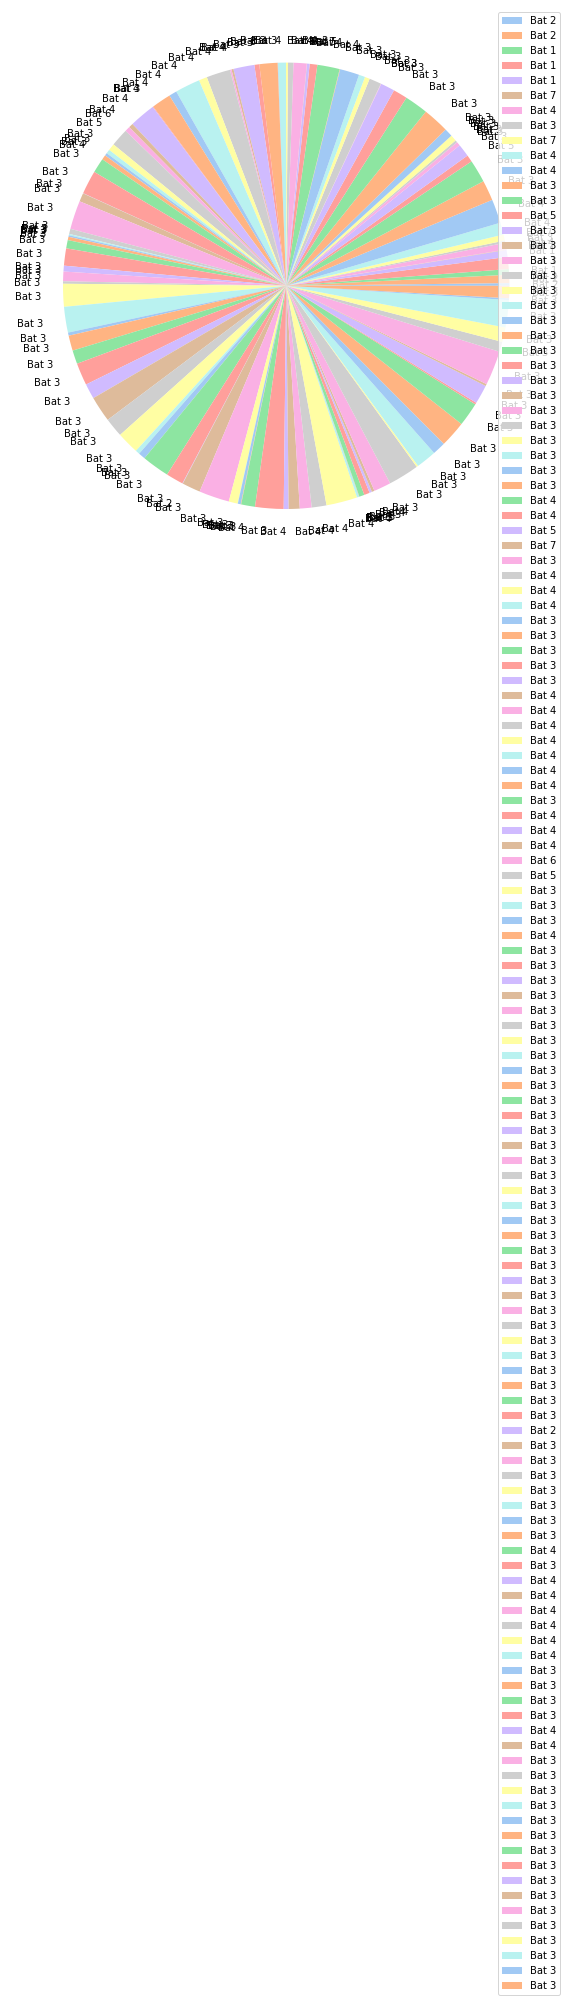

In [157]:
# Now let’s have a look at the total runs scored by Virat Kohli in different positions:

fig = plt.figure(figsize = (10,15))
labels= data['pos1']
counts = data['Runs']
colors = sns.color_palette('pastel')
plt.pie(x=counts,labels=data['pos1'],colors=colors)
plt.legend(loc=0)
plt.show()

In [182]:
#Now let’s have a look at the number of centuries scored by Virat Kohli while batting in the first innings and second innings:

cent = data.query("Runs >= 100")
figure = px.bar(centuries, x=cent["Inns"], y = cent["Runs"], 
                color = cent["Runs"],
                title="Centuries By Virat Kohli in First Innings Vs. Second Innings")
figure.show()

In [186]:
# Now let’s have a look at the kind of dismissals Virat Kohli faced most of the time:

dismissal = data["Dismissal"].value_counts()
label = dismissal.index
counts = dismissal.values
colors = sns.color_palette('pastel')

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Dismissals of Virat Kohli')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()



In [187]:
#Now let’s have a look at against which team Virat Kohli scored most of his runs:

figure = px.bar(data, x=data["Opposition"], y = data["Runs"], color = data["Runs"],
            title="Most Runs Against Teams")
figure.show()



In [188]:
figure = px.bar(centuries, x=centuries["Opposition"], y = centuries["Runs"], 
                color = centuries["Runs"],
                title="Most Centuries Against Teams")
figure.show()

In [189]:
strike_rate = data.query("SR >= 120")
print(strike_rate)

     Runs  BF  4s  6s      SR  Pos Dismissal  Inns     Opposition  \
8      27  19   4   0  142.10    7    bowled     1    v Sri Lanka   
32    100  83   8   2  120.48    4   not out     1   v Bangladesh   
56     23  11   3   0  209.09    6   not out     1  v West Indies   
76     43  34   4   1  126.47    3    caught     1      v England   
78    102  83  13   2  122.89    3    caught     1  v West Indies   
83    100  52   8   7  192.30    3   not out     2    v Australia   
85    115  66  18   1  174.24    3   not out     2    v Australia   
93     78  65   7   2  120.00    3    caught     2  v New Zealand   
130     8   5   2   0  160.00    3    caught     1      v England   

            Ground Start Date          Pos1   pos1  
8           Rajkot  15-Dec-09  Batting At 7  Bat 7  
32           Dhaka  19-Feb-11  Batting At 4  Bat 4  
56          Indore  08-Dec-11  batting At 6  Bat 6  
76      Birmingham  23-Jun-13  Batting At 3  Bat 3  
78   Port of Spain  05-Jul-13  Batting At 3 

In [190]:
figure = px.bar(strike_rate, x = strike_rate["Inns"], 
                y = strike_rate["SR"], 
                color = strike_rate["SR"],
            title="Virat Kohli's High Strike Rates in First Innings Vs. Second Innings")
figure.show()

In [191]:
figure = px.scatter(data_frame = data, x="Runs",
                    y="4s", size="SR", trendline="ols", 
                    title="Relationship Between Runs Scored and Fours")
figure.show()